# Activation Functions
## Environment setup

In [28]:
import platform
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import softmax

print(f"Python version: {platform.python_version()}")

Python version: 3.10.5


## Linear
A straight line function where activation is proportional to input ( which is the weighted sum from neuron ).

### Function

$$ 
R(z,m) = \begin{Bmatrix} z*m \end{Bmatrix}
$$

In [2]:
def linear(z,m):
	return m*z

### Derivative

$$
R'(z,m) = \begin{Bmatrix} m \end{Bmatrix}
$$

In [3]:
def linear_prime(z,m):
	return m

```{admonition} Pros
:class: tip
- It gives a range of activations, so it is not binary activation.
- We can definitely connect a few neurons together and if more than 1 fires, we could take the max ( or softmax) and decide based on that.
```

```{admonition} Cons
:class: error
- For this function, derivative is a constant. That means, the gradient has no relationship with X.
- It is a constant gradient and the descent is going to be on constant gradient.
- If there is an error in prediction, the changes made by back propagation is constant and not depending on the change in input delta(x) !
```

## ELU
**Exponential Linear Unit** or its widely known name **ELU** is a function that tend to converge cost to zero faster and produce more accurate results. Different to other activation functions, ELU has a extra alpha constant which should be positive number.

ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.

### Function

$$
R(z) = \begin{Bmatrix} z & z > 0 \\
α.( e^z – 1) & z <= 0 \end{Bmatrix}  
$$

In [4]:
def elu(z,alpha):
	return z if z >= 0 else alpha*(np.exp(z) -1)

### Derivative

$$
R'(z) = \begin{Bmatrix} 1 & z>0 \\
α.e^z & z<0 \end{Bmatrix}
$$

In [5]:
def elu_prime(z,alpha):
	return 1 if z > 0 else alpha*np.exp(z)

```{admonition} Pros
:class: tip
- 
```

```{admonition} Cons
:class: error
- 
```

## ReLU

A recent invention which stands for Rectified Linear Units. The formula is deceptively simple: $max(0,z)$. 
Despite its name and appearance, it’s not linear and provides the same benefits as Sigmoid (i.e. the ability to learn nonlinear functions), but with better performance.

### Function

$$
R(z) = \begin{Bmatrix} z & z > 0 \\
0 & z <= 0 \end{Bmatrix} 
$$

In [29]:
def relu(z):
  return np.maximum(0, z)

### Derivative

$$
R'(z) = \begin{Bmatrix} 1 & z>0 \\
0 & z<0 \end{Bmatrix}
$$

In [7]:
def relu_prime(z):
  return 1 if z > 0 else 0

```{admonition} Pros
:class: tip
- 
```

```{admonition} Cons
:class: error
- 
```

## LeakyReLU
LeakyRelu is a variant of ReLU. Instead of being 0 when $z < 0$, a leaky ReLU allows a small, non-zero, constant gradient $\alpha$ (Normally, $\alpha = 0.01$. However, the consistency of the benefit across tasks is presently unclear.) See more [here]()
### Function

$$
R(z) = \begin{Bmatrix} z & z > 0 \\
\alpha z & z <= 0 \end{Bmatrix}
$$

In [8]:
def leakyrelu(z, alpha):
	return max(alpha * z, z)

### Derivative

$$
R'(z) = \begin{Bmatrix} 1 & z>0 \\
\alpha & z<0 \end{Bmatrix}
$$

In [9]:
def leakyrelu_prime(z, alpha):
	return 1 if z > 0 else alpha

```{admonition} Pros
:class: tip
- 
```

```{admonition} Cons
:class: error
- 
```

## Sigmoid
Sigmoid takes a real value as input and outputs another value between 0 and 1. It’s easy to work with and has all the nice properties of activation functions: it’s non-linear, continuously differentiable, monotonic, and has a fixed output range.
### Function

$$
S(z) = \frac{1} {1 + e^{-z}}
$$

In [10]:
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

### Derivative

$$
S'(z) = S(z) \cdot (1 - S(z))
$$

In [11]:
def sigmoid_prime(z):
  return sigmoid(z) * (1-sigmoid(z))

```{admonition} Pros
:class: tip
- 
```

```{admonition} Cons
:class: error
- 
```

## Softmax
Softmax function calculates the probabilities distribution of the event over ‘n’ different events. In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs.
### Function

$$
\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

### Derivative

$$

$$

```{admonition} Pros
:class: tip
- 
```

```{admonition} Cons
:class: error
- 
```

## Tanh

### Function

$$
tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} = 2\sigma(2z) - 1
$$

In [12]:
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

### Derivative

$$
tanh'(z) = 1 - tanh(z)^{2} 
$$

In [13]:
def tanh_prime(z):
	return 1 - np.power(tanh(z), 2)

```{admonition} Pros
:class: tip
- 
```

```{admonition} Cons
:class: error
- 
```

## Visualization

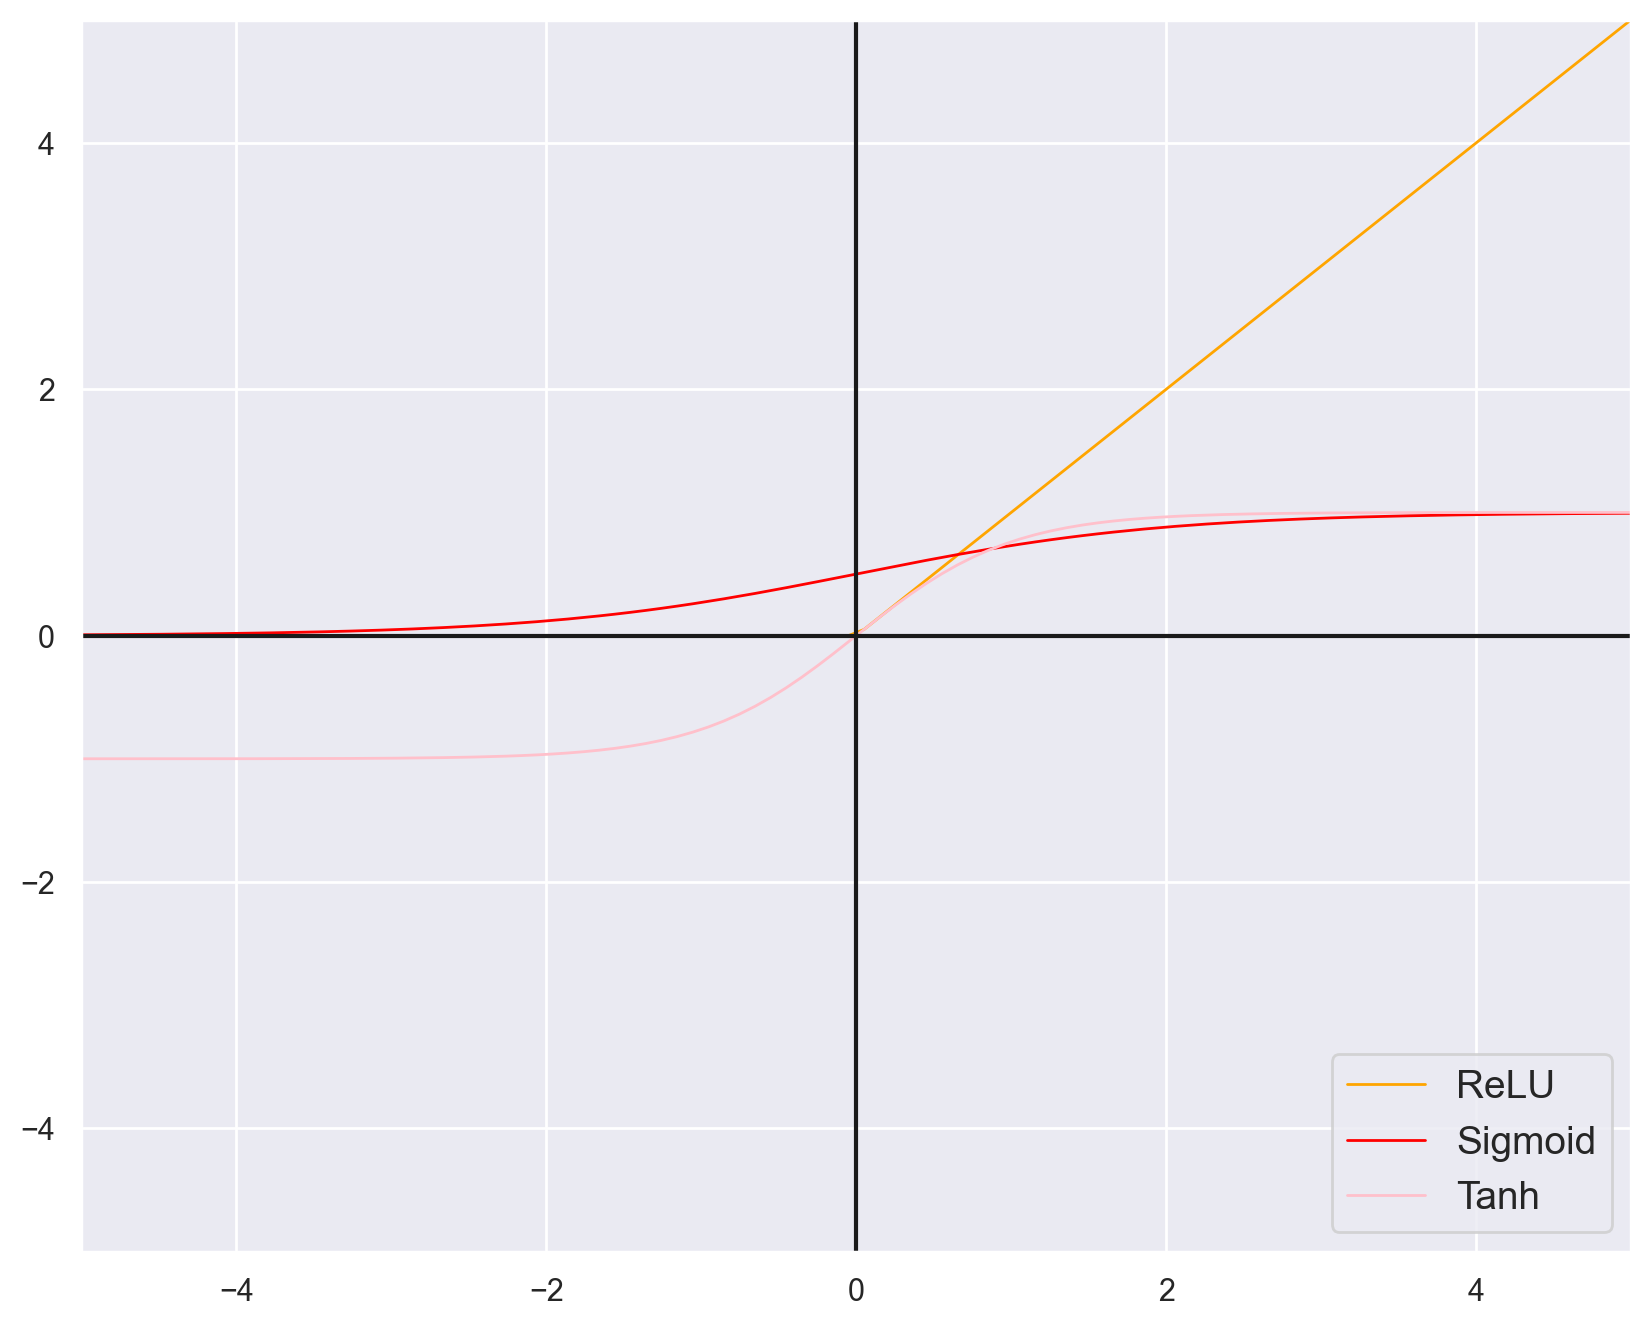

In [35]:
z = np.linspace(-10, 10, 200)
plt.plot(z, np.array(list(map(relu, z))), linewidth=1, label="ReLU", color="orange")
plt.plot(z, sigmoid(z), linewidth=1, label="Sigmoid", color="red")
plt.plot(z, tanh(z), linewidth=1, label="Tanh",color="pink")
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([0, 0], [-5, 5], "k-")
plt.axis([-5, 5, -5, 5])
plt.legend(loc="lower right", fontsize=14)
plt.show()